In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import chi2_contingency
import statsmodels.api as sm

## Mental Health Disorder Symptoms Analysis


In [138]:
dataset = pd.read_csv('mental_health_finaldata_1.csv')
dataset.shape

(824, 13)

In [139]:
dataset.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


Age: There are 4 age categories present in the dataset, with "30-Above" being the most common age group, occurring 222 times.

Gender: There are 2 gender categories, with "Female" being the most common gender, occurring 434 times.

Occupation: There are 5 occupation categories, with "Housewife" being the most common occupation, occurring 185 times.

Days_Indoors: There are 5 categories representing the number of days indoors, with "31-60 days" being the most common duration, occurring 171 times.

Growing_Stress, Quarantine_Frustrations, Changes_Habits, Mental_Health_History, Weight_Change, Coping_Struggles, Work_Interest, Social_Weakness: These variables each have 3 categories, and the most common category for each variable is "Yes", occurring with varying frequencies.

#### Gender vs Moodswings

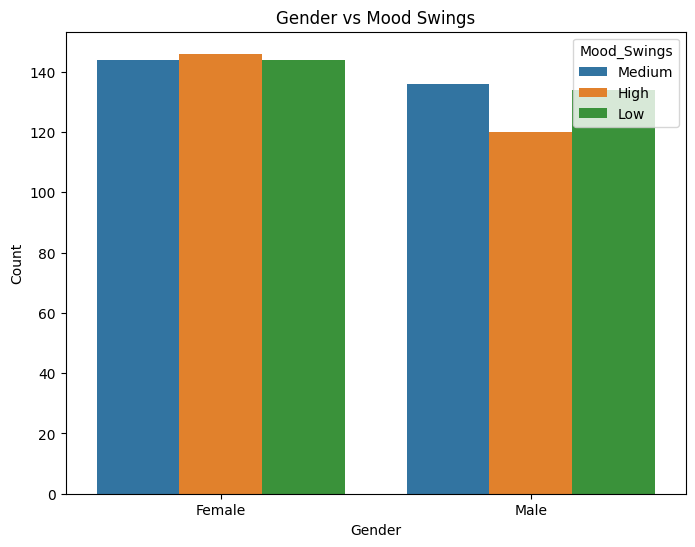

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Mood_Swings', data=dataset)
plt.title('Gender vs Mood Swings')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* Females appear to have a higher frequency of mood swings compared to males.

* The proportion of mood swings is noticeably higher in females than in males.

#### Age vs Growing Stress

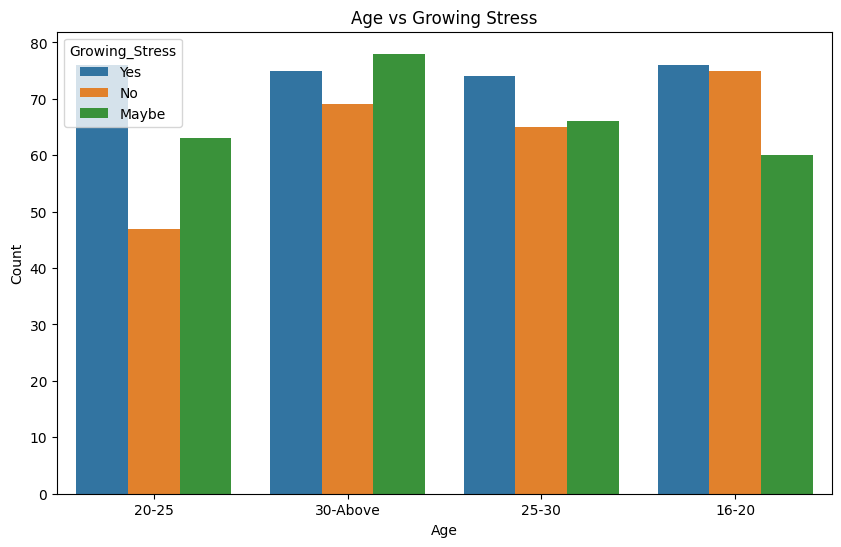

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Growing_Stress', data=dataset)
plt.title('Age vs Growing Stress')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* The age group "30-Above" also exhibits the highest frequency of growing stress.

#### Occupation vs Growing_Stress


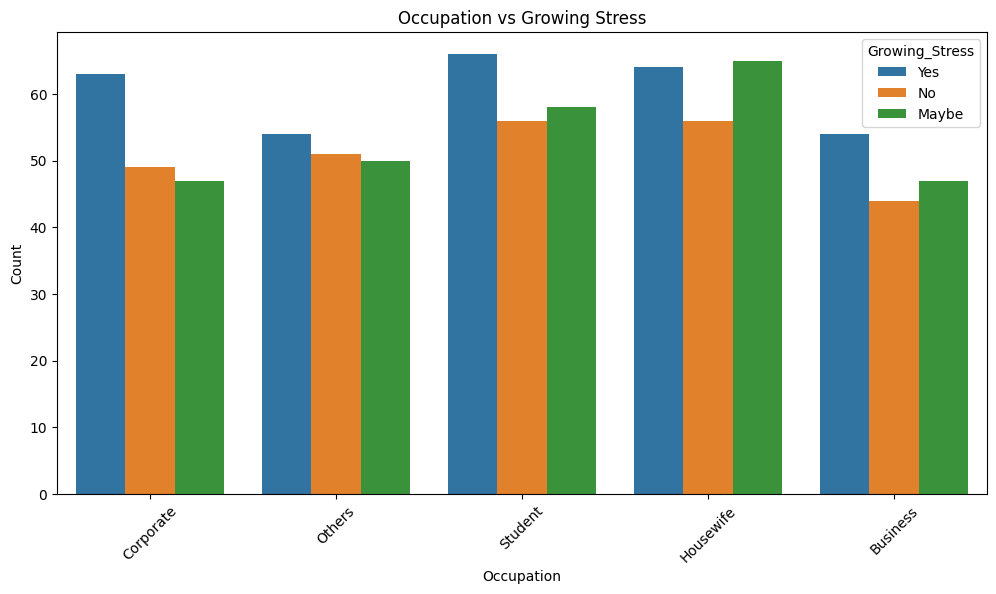

In [142]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Growing_Stress', data=dataset)
plt.title('Occupation vs Growing Stress')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Housewives and Students exhibit a higher frequency of growing stress compared to other occupations.


#### Occupation vs Mood Swings

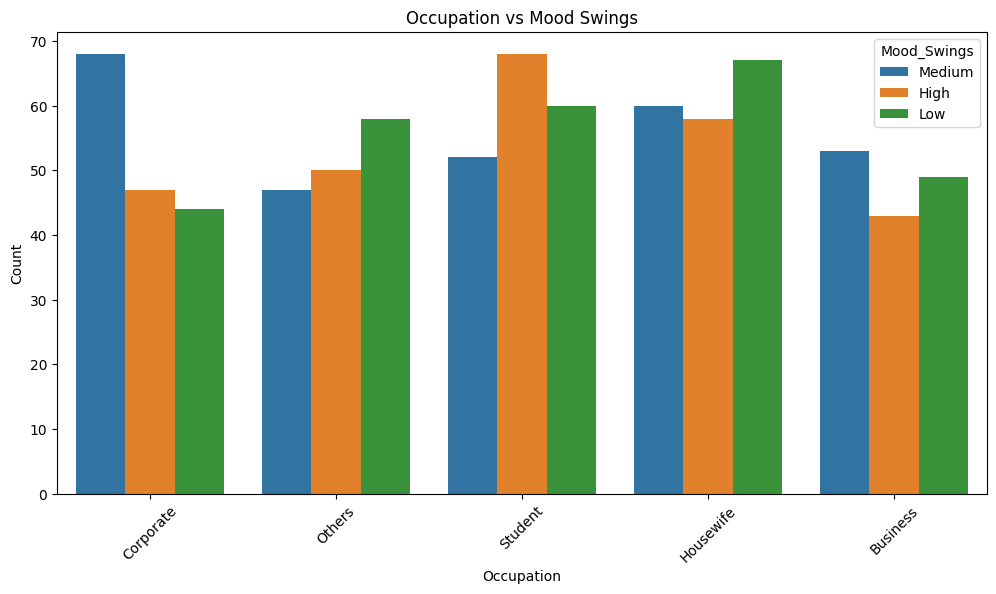

In [143]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Mood_Swings', data=dataset)
plt.title('Occupation vs Mood Swings')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Students and Corporate Professionals show a relatively higher frequency of mood swings compared to other occupations.

#### Mood Swings vs Growing Stress

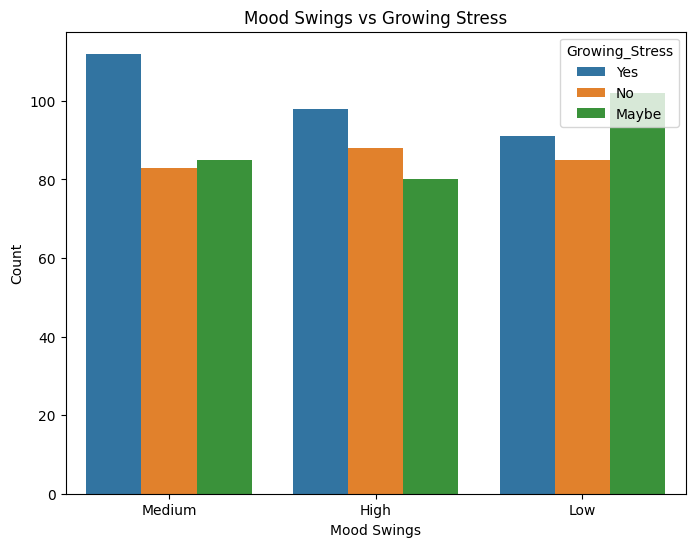

In [144]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Mood_Swings', hue='Growing_Stress', data=dataset)
plt.title('Mood Swings vs Growing Stress')
plt.xlabel('Mood Swings')
plt.ylabel('Count')
plt.show()

* Individuals experiencing mood swings also tend to experience growing stress, indicating a potential correlation between these two factors.

####  Social Weakness vs Mood Swings

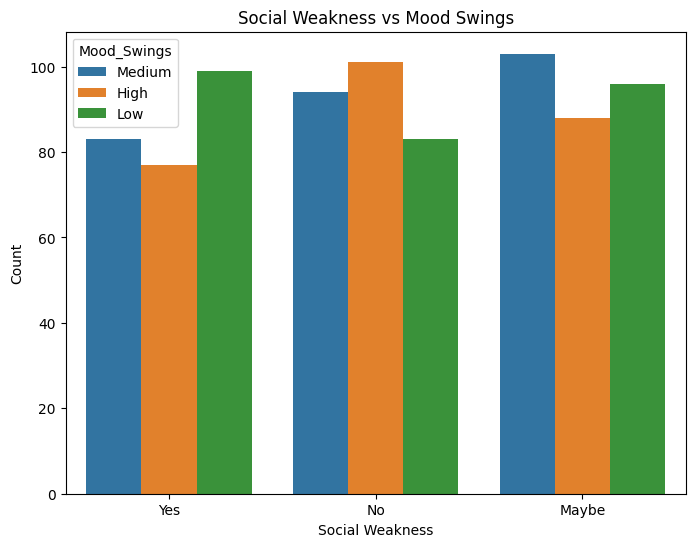

In [145]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Social_Weakness', hue='Mood_Swings', data=dataset)
plt.title('Social Weakness vs Mood Swings')
plt.xlabel('Social Weakness')
plt.ylabel('Count')
plt.show()

* There doesn't exist a linear relationship between social weakness and mood swings

#### Weight Change vs Mood Swings

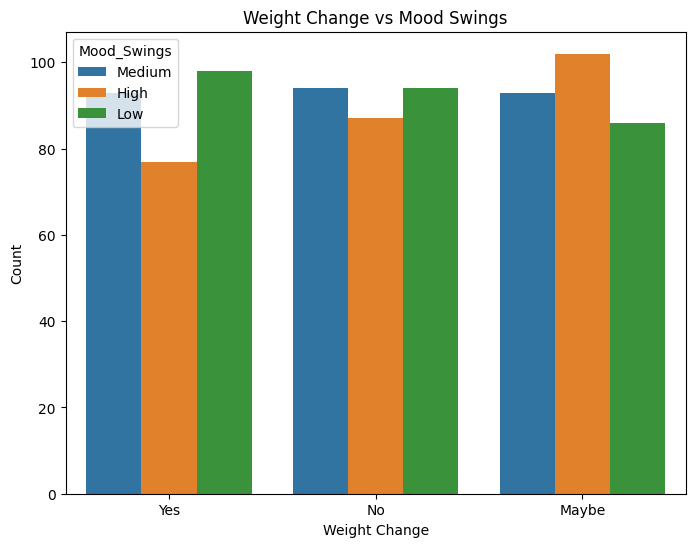

In [146]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weight_Change', hue='Mood_Swings', data=dataset)
plt.title('Weight Change vs Mood Swings')
plt.xlabel('Weight Change')
plt.ylabel('Count')
plt.show()

* There is a noticeable difference in the frequency of mood swings among individuals based on their weight change.

## Hypothesis Testing

In [181]:
# Hypothesis
#H0: There is no relationship between Gender and Mood Swings
#HA: There is a significant relationship between Gender and Mood Swings

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Gender"], dataset["Mood_Swings"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 467.47757998002
P-value: 0.550113160833305
Fail to reject the null hypothesis - No statistically significant relationship


In [148]:
# Hypothesis
#H0: There is no relationship between Age and Growing Stress
#HA: There is a significant relationship between Age and Growing Stress

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Age"], dataset["Growing_Stress"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 6.502951829944582
P-value: 0.36926452179802627
Reject the null hypothesis - Statistically significant relationship


In [149]:
# Hypothesis
#H0: There is no relationship between Occupation and Mood_Swings
#HA: There is a significant relationship between Occupation and Mood_Swings

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Occupation"], dataset["Mood_Swings"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 11.119438787125908
P-value: 0.19502304849018756
Reject the null hypothesis - Statistically significant relationship


In [150]:
# Hypothesis
#H0: There is no relationship between Occupation and Growing Stress
#HA: There is a significant relationship between Occupation and Growing Stress

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Occupation"], dataset["Growing_Stress"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 1.807737395115538
P-value: 0.9863493092279183
Fail to reject the null hypothesis - No statistically significant relationship


In [151]:
# Hypothesis
#H0: There is no relationship between Mood_Swings and Growing Stress
#HA: There is a significant relationship between Mood_Swings and Growing Stress

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Mood_Swings"], dataset["Growing_Stress"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 4.962805724417215
P-value: 0.2911351960887624
Reject the null hypothesis - Statistically significant relationship


In [183]:
# Hypothesis
#H0: There is no relationship between Social_Weakness and Mood_Swings
#HA: There is a significant relationship between Social_Weakness and Mood_Swings

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Social_Weakness"], dataset["Mood_Swings"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 758.6548629090453
P-value: 0.425330778257634
Reject the null hypothesis - Statistically significant relationship


In [153]:
# Hypothesis
#H0: There is no relationship between Weight_Change and Mood_Swings
#HA: There is a significant relationship between Weight_Change and Mood_Swings

# Statistical Test: Chi-squared test
crosstab = pd.crosstab(dataset["Weight_Change"], dataset["Mood_Swings"])
alpha = 0.5
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis - Statistically significant relationship")
else:
    print("Fail to reject the null hypothesis - No statistically significant relationship")


Chi-squared value: 4.065098925241996
P-value: 0.39726735364421484
Reject the null hypothesis - Statistically significant relationship


## Data Preparation:

### Missing values:

In [154]:
total_rows = len(dataset)

missing_categorical = {}
missing_numerical = {}

for column in dataset.columns:
    missing_count = dataset[column].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100

    if dataset[column].dtype == 'object':
        missing_categorical[column] = missing_percentage
    else:
        missing_numerical[column] = missing_percentage

print("Missing value percentages for categorical features:")
for column, percentage in missing_categorical.items():
    print(f"{column}: {percentage:.2f}%")

print("\nMissing value percentages for numerical features:")
for column, percentage in missing_numerical.items():
    print(f"{column}: {percentage:.2f}%")

Missing value percentages for categorical features:
Age: 0.00%
Gender: 0.00%
Occupation: 0.00%
Days_Indoors: 0.00%
Growing_Stress: 0.00%
Quarantine_Frustrations: 0.00%
Changes_Habits: 0.00%
Mental_Health_History: 0.00%
Weight_Change: 0.00%
Mood_Swings: 0.00%
Coping_Struggles: 0.00%
Work_Interest: 0.00%
Social_Weakness: 0.00%

Missing value percentages for numerical features:


### Categorical and Numerical Features:

In [155]:
datatype = dataset.dtypes

categorical_features = []
numerical_features = []

for column, dtype in datatype.items():
    if dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Columns(",len(dataset.columns),"):",dataset.columns)
print("\nCategorical features(",len(categorical_features),"):", categorical_features)
print("Numerical features(",len(numerical_features),"):", numerical_features)

Columns( 13 ): Index(['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
       'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
       'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
       'Social_Weakness'],
      dtype='object')

Categorical features( 13 ): ['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']
Numerical features( 0 ): []


### Encoding Categorical features:

#### Encode Age:

In [156]:
dataset["Age"].replace("30-Above", "30-100", inplace=True)

dataset[["age_lower", "age_upper"]] = dataset["Age"].str.split("-", expand=True)

dataset["age_lower"] = pd.to_numeric(dataset["age_lower"])
dataset["age_upper"] = pd.to_numeric(dataset["age_upper"])

dataset.drop(columns=["Age"], inplace=True)

print(dataset.head())


   Gender Occupation        Days_Indoors Growing_Stress  \
0  Female  Corporate           1-14 days            Yes   
1    Male     Others          31-60 days            Yes   
2  Female    Student    Go out Every day             No   
3    Male     Others           1-14 days            Yes   
4  Female    Student  More than 2 months            Yes   

  Quarantine_Frustrations Changes_Habits Mental_Health_History Weight_Change  \
0                     Yes             No                   Yes           Yes   
1                     Yes          Maybe                    No            No   
2                      No            Yes                    No            No   
3                      No          Maybe                    No         Maybe   
4                     Yes            Yes                    No           Yes   

  Mood_Swings Coping_Struggles Work_Interest Social_Weakness  age_lower  \
0      Medium               No            No             Yes         20   
1        High 

#### Encode Gender:

In [157]:
label_encoder = LabelEncoder()
dataset["Gender"] = label_encoder.fit_transform(dataset["Gender"])

print(dataset.head())


   Gender Occupation        Days_Indoors Growing_Stress  \
0       0  Corporate           1-14 days            Yes   
1       1     Others          31-60 days            Yes   
2       0    Student    Go out Every day             No   
3       1     Others           1-14 days            Yes   
4       0    Student  More than 2 months            Yes   

  Quarantine_Frustrations Changes_Habits Mental_Health_History Weight_Change  \
0                     Yes             No                   Yes           Yes   
1                     Yes          Maybe                    No            No   
2                      No            Yes                    No            No   
3                      No          Maybe                    No         Maybe   
4                     Yes            Yes                    No           Yes   

  Mood_Swings Coping_Struggles Work_Interest Social_Weakness  age_lower  \
0      Medium               No            No             Yes         20   
1        High 

#### Encode Occupation:

In [158]:
dataset = pd.get_dummies(dataset, columns=["Occupation"], prefix="Occupation")

label_encoder = LabelEncoder()
for col in dataset.columns:
    if col.startswith("Occupation_"):
        dataset[col] = label_encoder.fit_transform(dataset[col])

print(dataset.head())

   Gender        Days_Indoors Growing_Stress Quarantine_Frustrations  \
0       0           1-14 days            Yes                     Yes   
1       1          31-60 days            Yes                     Yes   
2       0    Go out Every day             No                      No   
3       1           1-14 days            Yes                      No   
4       0  More than 2 months            Yes                     Yes   

  Changes_Habits Mental_Health_History Weight_Change Mood_Swings  \
0             No                   Yes           Yes      Medium   
1          Maybe                    No            No        High   
2            Yes                    No            No      Medium   
3          Maybe                    No         Maybe      Medium   
4            Yes                    No           Yes      Medium   

  Coping_Struggles Work_Interest Social_Weakness  age_lower  age_upper  \
0               No            No             Yes         20         25   
1         

#### Encode Days_Indoor:

In [159]:
def split_days(days):
    if days == 'Go out Every day':
        return 0, 0
    elif days == 'More than 2 months':
        return 60, 60
    else:
        days_list = [int(s) for s in days.replace(' days', '').split('-') if s.isdigit()]
        return days_list[0], days_list[1]

dataset[['Indoor_Days_Lower', 'Indoor_Days_Higher']] = dataset['Days_Indoors'].apply(split_days).apply(pd.Series)
dataset.drop(columns=["Days_Indoors"], inplace=True)

print(dataset.head())

   Gender Growing_Stress Quarantine_Frustrations Changes_Habits  \
0       0            Yes                     Yes             No   
1       1            Yes                     Yes          Maybe   
2       0             No                      No            Yes   
3       1            Yes                      No          Maybe   
4       0            Yes                     Yes            Yes   

  Mental_Health_History Weight_Change Mood_Swings Coping_Struggles  \
0                   Yes           Yes      Medium               No   
1                    No            No        High               No   
2                    No            No      Medium              Yes   
3                    No         Maybe      Medium               No   
4                    No           Yes      Medium              Yes   

  Work_Interest Social_Weakness  age_lower  age_upper  Occupation_Business  \
0            No             Yes         20         25                    0   
1            No     

#### Encode Mood_Swings:

In [160]:
print(dataset["Mood_Swings"].unique())

mapping = {"Low": 0, "Medium": 1, "High": 2}

dataset["Mood_Swings"] = dataset["Mood_Swings"].map(mapping)

print(dataset.head())


['Medium' 'High' 'Low']
   Gender Growing_Stress Quarantine_Frustrations Changes_Habits  \
0       0            Yes                     Yes             No   
1       1            Yes                     Yes          Maybe   
2       0             No                      No            Yes   
3       1            Yes                      No          Maybe   
4       0            Yes                     Yes            Yes   

  Mental_Health_History Weight_Change  Mood_Swings Coping_Struggles  \
0                   Yes           Yes            1               No   
1                    No            No            2               No   
2                    No            No            1              Yes   
3                    No         Maybe            1               No   
4                    No           Yes            1              Yes   

  Work_Interest Social_Weakness  age_lower  age_upper  Occupation_Business  \
0            No             Yes         20         25               

#### Encode Growing_Stress, Quarantine_Frustrations, Changes_Habits, Mental_Health_History, Weight_Change, Coping_Struggles, Work_Interest, Social_Weakness:

In [161]:
mapping = {"No": 0, "Maybe": 1, "Yes": 2}

for column in ['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
               'Weight_Change', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']:
    dataset[column] = dataset[column].map(mapping)

print(dataset.head())

   Gender  Growing_Stress  Quarantine_Frustrations  Changes_Habits  \
0       0               2                        2               0   
1       1               2                        2               1   
2       0               0                        0               2   
3       1               2                        0               1   
4       0               2                        2               2   

   Mental_Health_History  Weight_Change  Mood_Swings  Coping_Struggles  \
0                      2              2            1                 0   
1                      0              0            2                 0   
2                      0              0            1                 2   
3                      0              1            1                 0   
4                      0              2            1                 2   

   Work_Interest  Social_Weakness  age_lower  age_upper  Occupation_Business  \
0              0                2         20         2

### Outliers:

#### Boxplot:

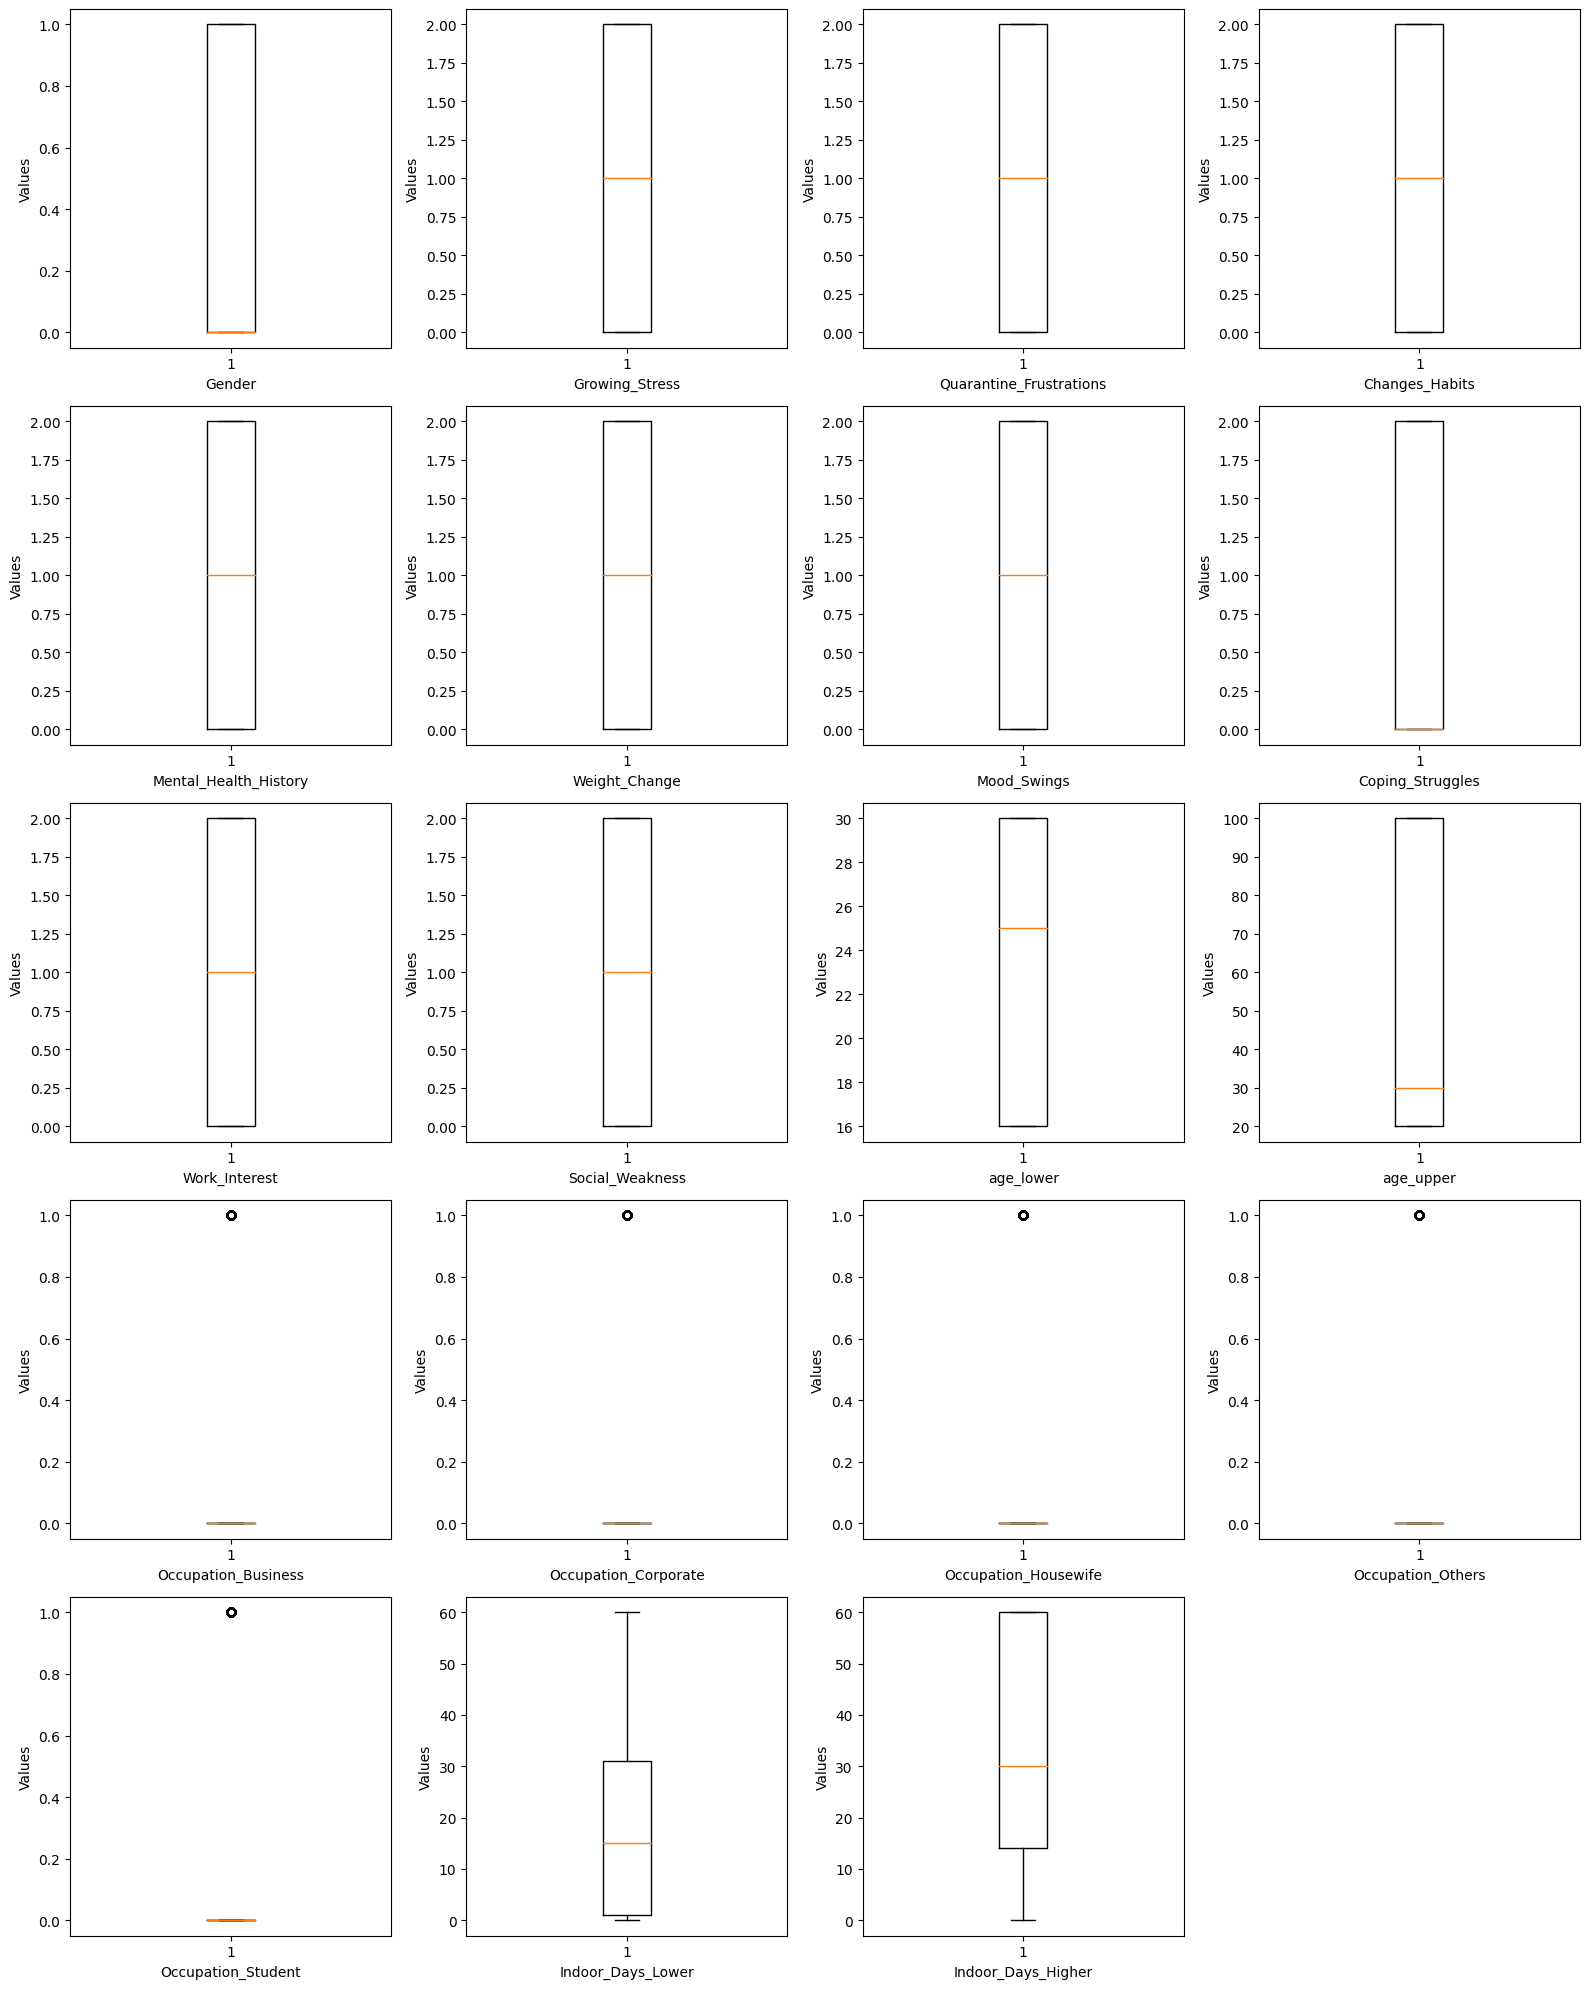

In [162]:
num_columns = len(dataset.columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(16, 4*num_rows))
axs = axs.flatten()

for i, column in enumerate(dataset.columns):
    axs[i].boxplot(dataset[column])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Values')

for j in range(num_columns, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### Outliers Count:

In [163]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outliers_counts = {}
for column in dataset.columns:
    outliers_counts[column] = count_outliers(dataset[column])

for column, count in outliers_counts.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in Gender: 0
Number of outliers in Growing_Stress: 0
Number of outliers in Quarantine_Frustrations: 0
Number of outliers in Changes_Habits: 0
Number of outliers in Mental_Health_History: 0
Number of outliers in Weight_Change: 0
Number of outliers in Mood_Swings: 0
Number of outliers in Coping_Struggles: 0
Number of outliers in Work_Interest: 0
Number of outliers in Social_Weakness: 0
Number of outliers in age_lower: 0
Number of outliers in age_upper: 0
Number of outliers in Occupation_Business: 145
Number of outliers in Occupation_Corporate: 159
Number of outliers in Occupation_Housewife: 185
Number of outliers in Occupation_Others: 155
Number of outliers in Occupation_Student: 180
Number of outliers in Indoor_Days_Lower: 0
Number of outliers in Indoor_Days_Higher: 0


### Feature Scaling:

In [164]:
norm = Normalizer()
dependent_variable = 'Mood_Swings'
independent_variables = dataset.columns.drop(dependent_variable)
n_data = norm.fit_transform(dataset[independent_variables])
n_dataset = pd.DataFrame(n_data, columns=independent_variables)
n_dataset = pd.concat([n_dataset, dataset[dependent_variable]], axis=1)

print(n_dataset.head())
n_dataset.describe()

     Gender  Growing_Stress  Quarantine_Frustrations  Changes_Habits  \
0  0.000000        0.056728                 0.056728        0.000000   
1  0.008038        0.016077                 0.016077        0.008038   
2  0.000000        0.000000                 0.000000        0.019148   
3  0.024008        0.048015                 0.000000        0.024008   
4  0.000000        0.022533                 0.022533        0.022533   

   Mental_Health_History  Weight_Change  Coping_Struggles  Work_Interest  \
0               0.056728       0.056728          0.000000       0.000000   
1               0.000000       0.000000          0.000000       0.000000   
2               0.000000       0.000000          0.019148       0.009574   
3               0.000000       0.024008          0.000000       0.024008   
4               0.000000       0.022533          0.022533       0.011267   

   Social_Weakness  age_lower  age_upper  Occupation_Business  \
0         0.056728   0.567276   0.709095     

,Gender,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Coping_Struggles,Work_Interest,Social_Weakness,age_lower,age_upper,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Indoor_Days_Lower,Indoor_Days_Higher,Mood_Swings
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.008733,0.019371,0.019680,0.019474,0.017856,0.018132,0.018129,0.017297,0.018194,0.388186,0.623916,0.003331,0.003470,0.004211,0.003052,0.004336,0.245678,0.432592,0.985437
std,0.011325,0.019822,0.020424,0.020108,0.019478,0.019702,0.022742,0.019020,0.019202,0.160173,0.226064,0.008274,0.008280,0.009128,0.007399,0.009436,0.230408,0.276294,0.812886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180242,0.225303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.241197,0.384111,0.000000,0.000000,0.000000,0.000000,0.000000,0.023930,0.273310,0.000000
50%,0.000000,0.014861,0.014857,0.014861,0.012806,0.012809,0.000000,0.012805,0.013359,0.319896,0.711676,0.000000,0.000000,0.000000,0.000000,0.000000,0.249191,0.475191,1.000000
75%,0.013365,0.026736,0.027640,0.026721,0.025611,0.025593,0.026726,0.025596,0.026724,0.568420,0.774473,0.000000,0.000000,0.000000,0.000000,0.000000,0.414255,0.661069,2.000000
max,0.038866,0.077498,0.077732,0.077557,0.077498,0.077674,0.077615,0.077674,0.077382,0.638929,0.957519,0.038720,0.038837,0.038895,0.038605,0.038837,0.676811,0.830296,2.000000


In [165]:
n_dataset.to_csv('mental_health_data_proc.csv', index=False)

### Distribution plot:

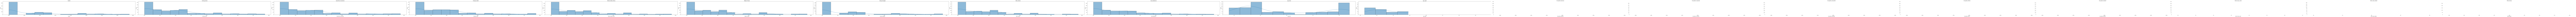

In [166]:
plt.figure(figsize=(600, 4))
for i, column in enumerate(n_dataset.columns):
    plt.subplot(1, len(n_dataset.columns), i+1)
    sns.histplot(n_dataset[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

## Prediction of a Symptom given others

Prediction of Mood_Swings:

In [167]:
dataset = pd.read_csv('mental_health_data_proc.csv')
X = dataset.drop(columns = ['Mood_Swings'])
y = dataset["Mood_Swings"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
X_train_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            Mood_Swings   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.255
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.212
Time:                        16:35:35   Log-Likelihood:                -778.31
No. Observations:                 659   AIC:                             1595.
Df Residuals:                     640   BIC:                             1680.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [169]:
print(dataset.corr())

                           Gender  Growing_Stress  Quarantine_Frustrations  \
Gender                   1.000000        0.164980                 0.175271   
Growing_Stress           0.164980        1.000000                 0.278680   
Quarantine_Frustrations  0.175271        0.278680                 1.000000   
Changes_Habits           0.206441        0.218778                 0.259141   
Mental_Health_History    0.153845        0.231790                 0.260475   
Weight_Change            0.214434        0.246379                 0.240906   
Coping_Struggles         0.110085        0.240067                 0.217153   
Work_Interest            0.144230        0.270133                 0.255628   
Social_Weakness          0.206066        0.270160                 0.248654   
age_lower                0.370610        0.465024                 0.448532   
age_upper                0.064009        0.068022                 0.065187   
Occupation_Business      0.043861        0.152738               

In [178]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
rf_regressor

RandomForestRegressor()

In [171]:
param_grid_rf = {
    'n_estimators': [200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

threshold = 1
y_pred_rf_thresholded = (y_pred_rf > threshold).astype(int)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score for Random Forest: 0.6828923869298488


In [172]:
for i in range (1,10):
  predictions = rf_regressor.predict(X_test.iloc[i:i+1, :])
  print(f"Predictions for the {i} dataframe in X_test:", predictions[0])


Predictions for the 1 dataframe in X_test: 1.0
Predictions for the 2 dataframe in X_test: 1.12
Predictions for the 3 dataframe in X_test: 0.82
Predictions for the 4 dataframe in X_test: 1.12
Predictions for the 5 dataframe in X_test: 0.78
Predictions for the 6 dataframe in X_test: 1.5
Predictions for the 7 dataframe in X_test: 1.13
Predictions for the 8 dataframe in X_test: 0.48
Predictions for the 9 dataframe in X_test: 0.94


In [173]:

accuracy = -grid_search_rf.best_score_

print("Accuracy:", accuracy)

Accuracy: 0.6828923869298488
